<a href="https://colab.research.google.com/github/bdanver/machine_learning/blob/master/labs/MASTER_CNN_dogs_N_cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An introduction to Convolutional Neural Networks in 3 Parts
![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/dogcat.png)
In this notebook we will start with 2 different threads:

1. An introduction to processing images. In our previous work with images (for example the MNIST data), the images were provided to us preprocessed. So we got a nicely formated CSV file. In this thread we will learn to process actual jpg images.
2. An introduction to convolutional networks (CNN).

Once you learn the basics of these two threads, you will combine them to create a CNN that processes images. Let's get started.

(This notebook is a remix of one by F. Chollet)

## Part 1 Step 1: Downloading the data

The cats vs. dogs dataset that we will use isn't packaged with Keras. It was made available by Kaggle.com as part of a computer vision 
competition in late 2013, back when convnets weren't quite mainstream. You can download the original dataset at: 
`https://www.kaggle.com/c/dogs-vs-cats/data` (you will need to create a Kaggle account if you don't already have one -- don't worry, the 
process is painless).

The pictures are medium-resolution color JPEGs. They look like this:

![cats_vs_dogs_samples](https://s3.amazonaws.com/book.keras.io/img/ch5/cats_vs_dogs_samples.jpg)

Unsurprisingly, the cats vs. dogs Kaggle competition in 2013 was won by entrants who used convnets (Convoluational Neural Networks or CNNs). The best entries could achieve up to 
95% accuracy. In our own example, we will get fairly close to this accuracy even though we will be training our 
models on less than 10% of the data that was available to the competitors.
This original dataset contains 25,000 images of dogs and cats (12,500 from each class) and is 543MB large (compressed). The zip file you will download contains a subset of this data. If you are interested in exploring more on your own you can download the full dataset from the Kaggle link above.

After downloading and uncompressing the file, we will create a new dataset containing three subsets: a training set with 1000 samples of each class, a validation set with 500 samples of each class, and finally a test set with 500 samples of each class.

Here are a few lines of code to do this:



In [ ]:
!wget http://zacharski.org/files/courses/cs419/cats_and_dogs.zip


--2020-11-08 23:32:38--  http://zacharski.org/files/courses/cs419/cats_and_dogs.zip
Resolving zacharski.org (zacharski.org)... 198.199.65.227
Connecting to zacharski.org (zacharski.org)|198.199.65.227|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 227917710 (217M) [application/zip]
Saving to: ‘cats_and_dogs.zip’

cats_and_dogs.zip   100%[===================>] 217.36M  78.1MB/s    in 2.8s    

2020-11-08 23:32:41 (78.1 MB/s) - ‘cats_and_dogs.zip’ saved [227917710/227917710]



In [ ]:
!unzip cats_and_dogs.zip

Streaming output truncated to the last 5000 lines.
  inflating: cats_and_dogs/cat.33.jpg  
  inflating: cats_and_dogs/cat.39.jpg  
  inflating: cats_and_dogs/cat.41.jpg  
  inflating: cats_and_dogs/cat.66.jpg  
  inflating: cats_and_dogs/cat.95.jpg  
  inflating: cats_and_dogs/cat.105.jpg  
  inflating: cats_and_dogs/cat.111.jpg  
  inflating: cats_and_dogs/cat.123.jpg  
  inflating: cats_and_dogs/cat.125.jpg  
  inflating: cats_and_dogs/cat.146.jpg  
  inflating: cats_and_dogs/cat.152.jpg  
  inflating: cats_and_dogs/cat.229.jpg  
  inflating: cats_and_dogs/cat.230.jpg  
  inflating: cats_and_dogs/cat.240.jpg  
  inflating: cats_and_dogs/cat.249.jpg  
  inflating: cats_and_dogs/cat.256.jpg  
  inflating: cats_and_dogs/cat.262.jpg  
  inflating: cats_and_dogs/cat.279.jpg  
  inflating: cats_and_dogs/cat.322.jpg  
  inflating: cats_and_dogs/cat.331.jpg  
  inflating: cats_and_dogs/cat.332.jpg  
  inflating: cats_and_dogs/cat.333.jpg  
  inflating: cats_and_dogs/cat.336.jpg  
  inflating

In [ ]:
!ls

cats_and_dogs  cats_and_dogs.zip  sample_data


In [ ]:
## Define the directories
import os, shutil
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = 'cats_and_dogs'

# The directory where we will
# store our smaller dataset
base_dir = 'cats_and_dogs_small'

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')

validation_dir = os.path.join(base_dir, 'validation')

test_dir = os.path.join(base_dir, 'test')


# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')


In [ ]:
## NOW MAKE AND POPULATE THOSE DIRECTORIES
os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
os.mkdir(train_dir)
os.mkdir(validation_dir)
os.mkdir(test_dir)

# Directory with our training cat pictures
os.mkdir(train_cats_dir)

# Directory with our training dog pictures
os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
os.mkdir(test_dogs_dir)

# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

Take a look at the code block above to see the directories where the images are stored and to gain an understanding of the steps we took.


## Part 1 Step 2: Data preprocessing

As you already know by now, data should be formatted into appropriately pre-processed floating point tensors before being fed into our 
network. Currently, our data sits on a drive as JPEG files, so the steps for getting it into our network are roughly:

* Read the picture files.
* Decode the JPEG content to RBG grids of pixels.
* Convert these into floating point tensors.
* Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know, neural networks prefer to deal with small input values).

It may seem a bit daunting, but thankfully Keras has utilities to take care of these steps automatically. Keras has a module with image 
processing helper tools, located at `keras.preprocessing.image`. In particular, it contains the class `ImageDataGenerator` which allows to 
quickly set up Python generators that can automatically turn image files on disk into batches of pre-processed tensors. This is what we 
will use here.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')




Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


**note**: the generators convert the jpeg images to the `target_size`. In the example above, the images are scaled to 150x150x3.

Suppose we construct a fully connected neural network model. We can fit our model to the data using the `train_generator` and `validation_generator` objects. The method `fit`, which we have used before, knows how to use data from data generators. One option with `fit` is to have the first argument be a Python generator that will yield batches of inputs and targets indefinitely, like ours does. 

Because the data is being generated endlessly, the generator needs to know  how many samples to draw from the generator before 
declaring an epoch over. This is the role of the `steps_per_epoch` argument: after having drawn `steps_per_epoch` batches from the 
generator, i.e. after having run for `steps_per_epoch` gradient descent steps, the fitting process will go to the next epoch. In our case, 
batches are 20-samples large, so it will take 100 batches until we see our target of 2000 samples. The math is super straight forward. For example, if our batch size is 25 how many batches to we need to accomdate 5,000 samples?  It's that simple.

When using `fit`, one may pass a `validation_data` argument. Importantly, this argument is 
allowed to be a data generator itself, but it could be a tuple of Numpy arrays as well. If you pass a generator as `validation_data`, then 
this generator is expected to yield batches of validation data endlessly, and thus you should also specify the `validation_steps` argument, 
which tells the process how many batches to draw from the validation generator for evaluation.

Here's an example:


      history = model.fit(
		      train_generator,
		      steps_per_epoch=100,
		      epochs=30,
		      validation_data=validation_generator,
		      validation_steps=50)
              
You will be coming back to this example, so remember it is here!              
 
## Part 1 Step 3: create and compile a fully connected model.
We are going to onstruct a fully connected model like we did for the mnist data. The architecture should be:

    ______________________________________________________________________
    Layer (type)             Output Shape         Param #      Activation  
    ======================================================================
    flatten_1 (Flatten)      (None, 67500)        0         
    ______________________________________________________________________
    dense_3 (Dense)          (None, 512)          34560512     relu
    ______________________________________________________________________
    dense_4 (Dense)          (None, 1)            513          sigmoid
    ======================================================================
    Total params: 34,561,025
    Trainable params: 34,561,025
    Non-trainable params: 0
    __________________________

I will add the first layer, you write the other 2:


In [ ]:
from keras import models
from keras import layers
## TO DO
network = models.Sequential()
network.add(layers.Flatten(input_shape=(150, 150, 3)))
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))

network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 67500)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               34560512  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 34,561,025
Trainable params: 34,561,025
Non-trainable params: 0
_________________________________________________________________


Compile the network using the following parameters:

 parameter | value
 :---: | :---:
 loss |'binary_crossentropy'
 optimizer| optimizers.RMSprop(lr=1e-4)
 metrics | ['acc']

 the optimizer parameter should look like 

 ```
 optimizer=optimizers.RMSprop(lr=1e-4),
 ```

In [ ]:
from keras import optimizers
## TO DO
network.compile(optimizer=optimizers.RMSprop(lr=1e-4),
                loss='binary_crossentropy',
                metrics=['acc'])

(make sure the loss was 'binary_crossentropy')

## Part 1 Step 4. Fit the model
Remember when we said 'remember' up above? That should help you with the code to fit the model.

In [ ]:
history = network.fit(
          train_generator,
          steps_per_epoch=100,
          epochs=30,
          validation_data=validation_generator,
          validation_steps=50)

Epoch 1/30
100/100 [==============================] - 39s 385ms/step - loss: 3.0160 - acc: 0.5130 - val_loss: 0.7762 - val_acc: 0.5440
Epoch 2/30
100/100 [==============================] - 40s 399ms/step - loss: 1.7572 - acc: 0.5220 - val_loss: 1.3149 - val_acc: 0.5020
Epoch 3/30
100/100 [==============================] - 38s 383ms/step - loss: 1.6425 - acc: 0.5260 - val_loss: 2.4267 - val_acc: 0.5000
Epoch 4/30
100/100 [==============================] - 38s 382ms/step - loss: 1.4806 - acc: 0.5305 - val_loss: 0.9338 - val_acc: 0.5330
Epoch 5/30
100/100 [==============================] - 38s 384ms/step - loss: 1.4049 - acc: 0.5195 - val_loss: 1.1136 - val_acc: 0.5080
Epoch 6/30
100/100 [==============================] - 38s 384ms/step - loss: 1.3076 - acc: 0.5325 - val_loss: 2.2482 - val_acc: 0.5000
Epoch 7/30
100/100 [==============================] - 39s 387ms/step - loss: 1.2270 - acc: 0.5515 - val_loss: 1.2653 - val_acc: 0.5020
Epoch 8/30
100/100 [==============================] - 3

![](http://zacharski.org/files/courses/cs419/dogcat.gif)

(This picture from [Becoming Human](https://becominghuman.ai/building-an-image-classifier-using-deep-learning-in-python-totally-from-a-beginners-perspective-be8dbaf22dd8))


That took quite a while and the training accuracy was pretty poor. My last line looked like:

```
Epoch 30/30
100/100 [==============================] - 9s 90ms/step - loss: 0.5624 - accuracy: 0.7045 - val_loss: 0.8046 - val_accuracy: 0.5560
```
So the accuracy on the training data was 70.45% and the accuracy on the validation data was only 55.6%. 

### Loss
The loss was .5624 and .8046 on our training and test data respectively. The loss function compares the predictions of the network with the correct labels and describes how close those predictions are. The smaller the loss the better.
We compiled our network using the binary crossentropy loss function:

$$Loss= -{{1}\over{N}}\sum_{i=1}^Ny_i log(p(y_i))+(1-y_i)log(1-p(y_i))$$

Consider the following small dataset with their true and predicted values:






dog | p(dog)
:--- | :---
1    | .8
0    | .4

So looking at the first row, the picture was of a dog and our model was 80% sure that it was a dog. Our loss would be...

$$Loss= -{{1}\over{2}}(1 (log(.8)) + 0(log(.2)) + 0(log(.4)) + 1(log(.6))$$

$$= -{{1}\over{2}}(1 (-0.223) + 0(-1.609) + 0(-0.916) + 1(-0.510)$$


$$= -{{1}\over{2}}(-0.223 + 0 + 0 + -0.510) = .366$$


Now if you skipped over that formula, that is unfortunate. Take a few minutes, go back, look it over and you will see that there is no magic here. The loss computation is straightforward.

### Accuracy on Test Data
Let's see how accurate our model is on the test data:

In [ ]:
scoreSeg = network.evaluate(test_generator)
print("Accuracy: ", scoreSeg[1])

50/50 [==============================] - 5s 102ms/step - loss: 0.7065 - acc: 0.5760
Accuracy:  0.5759999752044678


That is a disappointing result. Let's pause our work on this dataset to look at a new network architecture.

# Part 2: Convolutional Neural Networks.

## A guided tour

Let's start with what we learned in the first Keras Python Notebook

## Part 2 Step 1. Load the MNIST Dataset
First let's load the MNIST dataset from Keras into Numpy arrays called: 

     train_images, train_labels, test_images, test_labels
     
(We've done this before)

In [ ]:
from keras.datasets import mnist
## TO DO
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()



11493376/11490434 [==============================] - 0s 0us/step


## Part 2 Step 2: Reshape the Data
In the first notebook we reshaped the data into

     (60000, 28 * 28)
     
Basically, we flattened the image. For this notebook let's retain the 2D structure and reshape it:

     ((60000, 28, 28, 1))
     
At the same time we should also set the type to be `float32` in the range [0,1]

At the end of this step you should have new values for `train_images` and `test_images`

In [ ]:
train_images = train_images.reshape((60000, 28 ,28,1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 ,28,1))
test_images = test_images.astype('float32') / 255

## Part 2 Step 3: Categorically Encode the Labels

You should know how to do this from the previous notebook

In [ ]:
from keras.utils import to_categorical
## TO DO
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## Part 2 Step 4: Creating the Model - The ConvNet layers
This part I will give to you. 

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


## Part 2 Step 5. Adding Layers
Now we need to flatten the outputs of the ConvNet layers to the 1D representation our classifier needs.
The classification layer will be exactly the same as that in the first notebook

In [ ]:
model.add(layers.Flatten())

# TO DO
# ADD A 64 NODE DENSE LAYER WITH ACTIVATION RELU
model.add(layers.Dense(64, activation='relu', input_shape=(28, 28, 1)))

# ADD CLASSIFICATION LAYER ACTIVATION SOFTMAX
model.add(layers.Dense(10, activation='softmax'))

## Part 2 Step 6: Compile the Model
Now it is time to compile the model. Use the same optimizer, loss function, and accuracy metrics we used before.

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Now it is time to fit the model.

In [ ]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 43s 58ms/step - loss: 0.1999 - accuracy: 0.9364 - val_loss: 0.0613 - val_accuracy: 0.9829
Epoch 2/5
750/750 [==============================] - 44s 58ms/step - loss: 0.0542 - accuracy: 0.9833 - val_loss: 0.0554 - val_accuracy: 0.9836
Epoch 3/5
750/750 [==============================] - 44s 59ms/step - loss: 0.0366 - accuracy: 0.9883 - val_loss: 0.0389 - val_accuracy: 0.9887
Epoch 4/5
750/750 [==============================] - 44s 59ms/step - loss: 0.0276 - accuracy: 0.9917 - val_loss: 0.0367 - val_accuracy: 0.9898
Epoch 5/5
750/750 [==============================] - 44s 59ms/step - loss: 0.0209 - accuracy: 0.9935 - val_loss: 0.0353 - val_accuracy: 0.9902


## Part 2 Step 8. Run the Model on The Test Data
Run the Model on the Test Data and print the accuracy

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 3s 10ms/step - loss: 0.0275 - accuracy: 0.9914


0.9914000034332275

When you compare the performance this CNN model has over the model from our previous notebook you will see that it halved the error rate. This is extremely impressive!

## Part 2 Step 9. Graph The Loss and Accuracy
Let's use Matplotlib to plot the training and validation loss side by side, as well as the training and validation accuracy:

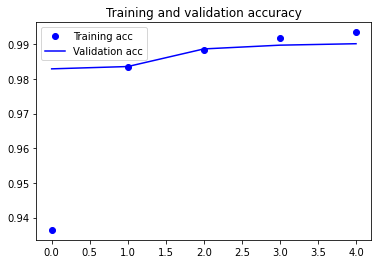

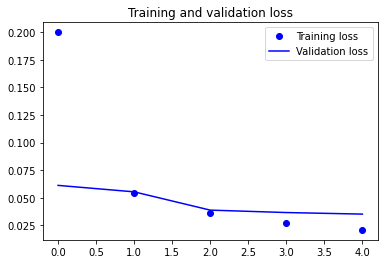

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Notice that the accuracy lines for training and validation closely match each other. The same is true for the loss lines. This indicates that our model is not overfitting.

# Part 3: Dogs 'n Cats with ConvNets
This Python notebook is a slight remix of one by François Chollet for his book *Deep Learning With Python*

## Previously in part 1... 
we downloaded the data then divided it up into a set of image files inside a number of directories. Let's make sure we have those images

In [ ]:
import os
base_dir = 'cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_dir = os.path.join(base_dir, 'validation')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_dir = os.path.join(base_dir, 'test')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')


print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


This should print:
    
    total training cat images: 1000
    total training dog images: 1000
    total validation cat images: 500
    total validation dog images: 500
    total test cat images: 500
    total test dog images: 500
    
## Part 3 Step 1: Building a ConvNet Model
We've already built a small convnet for MNIST in the previous example, so you should be familiar with them. We will reuse the same general structure: our convnet will be a stack of alternated `Conv2D` (with relu activation) and `MaxPooling2D` layers. Here are the steps we would like to do:

1. Create a sequential model
2. Add a `Conv2D` layer. Use 3x3 patches and a depth of 32. The input with be 150 x 150 pixel RGB images (depth of 3)
3. Add a `MaxPooling2D`  with a patch size of 2 x 2. 
4. Add another `Conv2D` layer. Use 3x3 patches and a depth of 64. 
5. Add a `MaxPooling2D`  with a patch size of 2 x 2. 
6. Add another `Conv2D` layer. Use 3x3 patches and a depth of 128.
7. Add a `MaxPooling2D`  with a patch size of 2 x 2. 
8. Add another `Conv2D` layer. Use 3x3 patches and a depth of 128.
9. Add a `MaxPooling2D`  with a patch size of 2 x 2. 
10. Finish up by flattening ...
11. Add a dense layer of 512
12. Add a binary classification layer with activation sigmoid.

In [ ]:
# TO DO

# ADD YOUR CODE HERE

from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512))
model.add(layers.Dense(1, activation='sigmoid'))

### Verify that we did it right. 
Let's check by using the summary method:

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 128)      

You should see:
    
    
		_________________________________________________________________
		Layer (type)                 Output Shape              Param #   
		=================================================================
		conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
		_________________________________________________________________
		max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
		_________________________________________________________________
		conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
		_________________________________________________________________
		max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
		_________________________________________________________________
		conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
		_________________________________________________________________
		max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
		_________________________________________________________________
		conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
		_________________________________________________________________
		max_pooling2d_4 (MaxPooling2 (None, 7, 7, 128)         0         
		_________________________________________________________________
		flatten_1 (Flatten)          (None, 6272)              0         
		_________________________________________________________________
		dense_1 (Dense)              (None, 512)               3211776   
		_________________________________________________________________
		dense_2 (Dense)              (None, 1)                 513       
		=================================================================
		Total params: 3,453,121
		Trainable params: 3,453,121
		Non-trainable params: 0
        
## Part 3 Step 2: Compile the Model

Set the parameters:

* set loss to be binary_crossentropy
* use `optimizers.RMSprop(lr=1e-4)` as the optimizer
* for metrics use `acc`



In [ ]:
    from keras import optimizers
## TODO
model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

## Part 3 Step 3: # Data Preprocessing
Use the same data preprocessing steps we used for the original Dogs n' Cats. You should create a `train_generator` and a `validation_generator`. 

In [ ]:
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

# test_generator = test_datagen.flow_from_directory(
#         test_dir,
#         target_size=(150, 150),
#         batch_size=20,
#         class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Part 3 Step 4: Fit the model
Use `fit_generator`. Don't forget to save the history.

1. Use 30 epochs
2. Each with 100 steps
3. Use the `validation_generator` as the validation data
4. Set the validation steps to 50.



In [ ]:
history = model.fit(
          train_generator,
          steps_per_epoch=100,
          epochs=30,
          validation_data=validation_generator,
          validation_steps=50)

Epoch 1/30
100/100 [==============================] - 110s 1s/step - loss: 0.6943 - acc: 0.5455 - val_loss: 0.6759 - val_acc: 0.6230
Epoch 2/30
100/100 [==============================] - 110s 1s/step - loss: 0.6564 - acc: 0.6445 - val_loss: 0.6599 - val_acc: 0.5830
Epoch 3/30
100/100 [==============================] - 108s 1s/step - loss: 0.6064 - acc: 0.6810 - val_loss: 0.6143 - val_acc: 0.6750
Epoch 4/30
100/100 [==============================] - 106s 1s/step - loss: 0.5591 - acc: 0.7070 - val_loss: 0.6351 - val_acc: 0.6410
Epoch 5/30
100/100 [==============================] - 107s 1s/step - loss: 0.5143 - acc: 0.7480 - val_loss: 0.6052 - val_acc: 0.6850
Epoch 6/30
100/100 [==============================] - 106s 1s/step - loss: 0.4776 - acc: 0.7640 - val_loss: 0.5565 - val_acc: 0.7300
Epoch 7/30
100/100 [==============================] - 106s 1s/step - loss: 0.4344 - acc: 0.8035 - val_loss: 0.5869 - val_acc: 0.7230
Epoch 8/30
100/100 [==============================] - 106s 1s/step - 

That is a total amazing accuracy on the training data and so-so accuracy on the validation set. 

## Part 3 Step 5: Evaluate the model using the test data.

In [ ]:
scoreSeg = model.evaluate(test_generator)
print("Accuracy: ", scoreSeg[1])

50/50 [==============================] - 14s 282ms/step - loss: 1.3771 - acc: 0.7210
Accuracy:  0.7210000157356262


In [ ]:
history.history

{'acc': [0.5454999804496765,
  0.6445000171661377,
  0.6809999942779541,
  0.7070000171661377,
  0.7480000257492065,
  0.7639999985694885,
  0.8034999966621399,
  0.8165000081062317,
  0.8339999914169312,
  0.8489999771118164,
  0.8669999837875366,
  0.8730000257492065,
  0.8880000114440918,
  0.9035000205039978,
  0.9259999990463257,
  0.9369999766349792,
  0.9440000057220459,
  0.9559999704360962,
  0.9614999890327454,
  0.9649999737739563,
  0.9779999852180481,
  0.9760000109672546,
  0.984000027179718,
  0.9850000143051147,
  0.9884999990463257,
  0.9915000200271606,
  0.987500011920929,
  0.9940000176429749,
  0.9955000281333923,
  0.9955000281333923],
 'loss': [0.6943053007125854,
  0.6563923954963684,
  0.6063598990440369,
  0.5590745806694031,
  0.5142640471458435,
  0.4776008129119873,
  0.43444204330444336,
  0.3989727795124054,
  0.37519747018814087,
  0.3493177592754364,
  0.31324395537376404,
  0.2922609746456146,
  0.2674926519393921,
  0.23634643852710724,
  0.2040702998

## Part 3 Step 6: Plot the loss and accuracy:

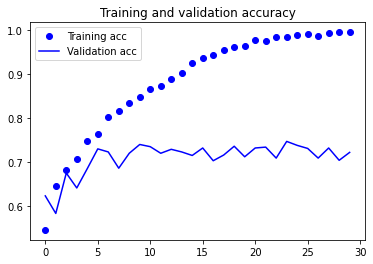

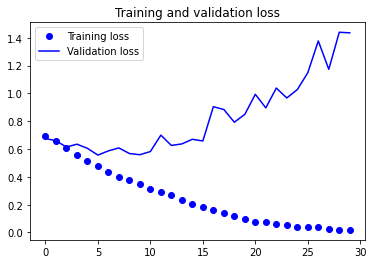

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Look at those plots. 
What do they indicate? Seriously, spend a few minutes looking at them. Please.

These plots show a classic case of overfitting. If you look at the blue dot line in the accuracy plot, which represents the accuracy on the training data, it increases in a beautiful linear way over the course of the epochs until it reaches near 100% accuracy (98.5% in my case). In contrast, the accuracy on the validation data sort of stalls out around epoch 5 and doesn't really improve. The same is true looking at the loss chart. The loss on the training data is a nice linear slope down until it approaches 0. But the validation loss actually goes up! 

One cause of overfitting is too small a dataset. In our case we only used 2,000 images. With such a small dataset overfitting is a major concern. One way of combatting overfitting is to use data augmentation.


# Using data augmentation

This section is directly from François Chollet 

Overfitting is caused by having too few samples to learn from, rendering us unable to train a model able to generalize to new data. Given infinite data, our model would be exposed to every possible aspect of the data distribution at hand: we would never overfit. Data augmentation takes the approach of generating more training data from existing training samples, by "augmenting" the samples via a number of random transformations that yield believable-looking images. The goal is that at training time, our model would never see the exact same picture twice. This helps the model get exposed to more aspects of the data and generalize better.
In Keras, this can be done by configuring a number of random transformations to be performed on the images read by our ImageDataGenerator instance. Let's get started with an example:



In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

These are just a few of the options available (for more, see the Keras documentation). Let's quickly go over what we just wrote:

* `rotation_range` is a value in degrees (0-180), a range within which to randomly rotate pictures.
* `width_shift` and `height_shift` are ranges (as a fraction of total width or height) within which to randomly translate pictures 
vertically or horizontally.
* `shear_range` is for randomly applying shearing transformations.
* `zoom_range` is for randomly zooming inside pictures.
* `horizontal_flip` is for randomly flipping half of the images horizontally -- relevant when there are no assumptions of horizontal 
asymmetry (e.g. real-world pictures).
* `fill_mode` is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.

Let's take a look at our augmented images:

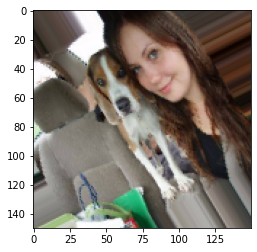

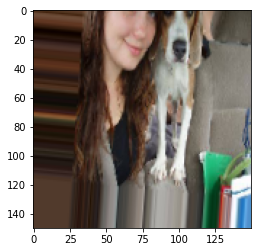

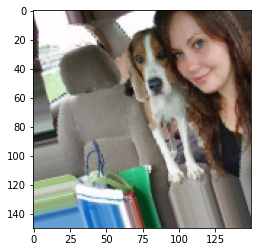

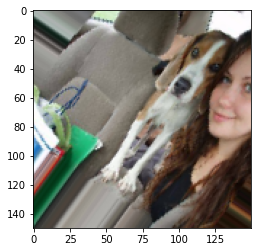

In [ ]:
import matplotlib.pyplot as plt 
# This is module with image preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_dogs_dir, fname) for fname in os.listdir(train_dogs_dir)]

# We pick one image to "augment"
#print(os.listdir(train_dogs_dir).index('dog.788.jpg'))
img_path = fnames[107]
# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

If we train a new network using this data augmentation configuration, our network will never see twice the same input. However, the inputs 
that it sees are still heavily intercorrelated, since they come from a small number of original images -- we cannot produce new information, 
we can only remix existing information. As such, this might not be quite enough to completely get rid of overfitting. To further fight 
overfitting, we will also add a Dropout layer to our model using: 

     augmented_model.add(layers.Dropout(0.5))

between the flatten layer and the densely-connected classifier. Copy your model declaration from above and add this line.

In [ ]:
# ADD YOUR CODE HERE

from keras import layers
from keras import models

aug_model = models.Sequential()

## TO DO
aug_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
aug_model.add(layers.MaxPooling2D((2, 2)))
aug_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
aug_model.add(layers.MaxPooling2D((2, 2)))
aug_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
aug_model.add(layers.MaxPooling2D((2, 2)))
aug_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
aug_model.add(layers.MaxPooling2D((2, 2)))

aug_model.add(layers.Flatten())
aug_model.add(layers.Dropout(0.5))
# aug_model.add(layers.Dense(512, activation='relu'))
aug_model.add(layers.Dense(512))
aug_model.add(layers.Dense(1, activation='sigmoid'))
aug_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 128)      

## Compile the Model
Use the same settings as before

In [ ]:
from keras import optimizers

# TO DO
aug_model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

Sweet! Here is the code for the augmented data generator:

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Fit the model
Now we will use these new generators to fit the model.

Use `fit_generator`. Don't forget to save the history.

1. Use 100 epochs
2. Each with 100 steps
3. Use the `validation_generator` as the validation data
4. Set the validation steps to 50

In [ ]:
history = aug_model.fit(
          train_generator,
          steps_per_epoch=100,
          epochs=100,
          validation_data=validation_generator,
          validation_steps=50)

Epoch 1/100
100/100 [==============================] - 113s 1s/step - loss: 0.6991 - acc: 0.5070 - val_loss: 0.6824 - val_acc: 0.5040
Epoch 2/100
100/100 [==============================] - 113s 1s/step - loss: 0.6834 - acc: 0.5430 - val_loss: 0.6867 - val_acc: 0.5030
Epoch 3/100
100/100 [==============================] - 113s 1s/step - loss: 0.6705 - acc: 0.5730 - val_loss: 0.6414 - val_acc: 0.6210
Epoch 4/100
100/100 [==============================] - 113s 1s/step - loss: 0.6581 - acc: 0.6105 - val_loss: 0.6541 - val_acc: 0.6030
Epoch 5/100
100/100 [==============================] - 113s 1s/step - loss: 0.6287 - acc: 0.6485 - val_loss: 0.6444 - val_acc: 0.6390
Epoch 6/100
100/100 [==============================] - 117s 1s/step - loss: 0.6246 - acc: 0.6365 - val_loss: 0.6084 - val_acc: 0.6490
Epoch 7/100
100/100 [==============================] - 115s 1s/step - loss: 0.6116 - acc: 0.6620 - val_loss: 0.6313 - val_acc: 0.6360
Epoch 8/100
100/100 [==============================] - 115s 1s

In [ ]:
scoreSeg = aug_model.evaluate(test_generator)
print("Accuracy: ", scoreSeg[1])

50/50 [==============================] - 14s 285ms/step - loss: 0.5040 - acc: 0.8020
Accuracy:  0.8019999861717224


### Let's plot our results again
One plot showing the training and validation accuracy, another showing training and validation loss.



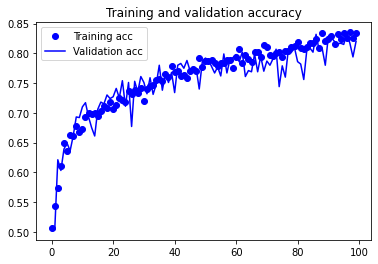

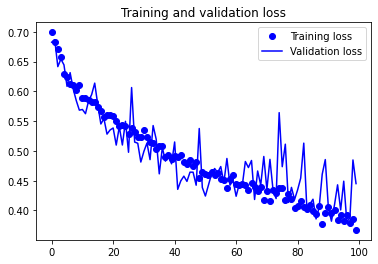

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Because of image augmentation and dropout we are no longer overfitting-- the lines for the training and validation accuracy are pretty well lined up as are the lines for loss. With this we get about a 15% improvement over our previous model.

With other techniques we can probably improve our model to reach a bit higher accuracies but we will hit a limit because of the paucity of data.In the next notebook we will examine ways of using pre-trained models to improve our accuracy.


## Just for fun
Just for grins, let's see how well our model does on a few test images.

In [ ]:
!ls cats_and_dogs_small/test/cats


cat.1500.jpg  cat.1600.jpg  cat.1700.jpg  cat.1800.jpg	cat.1900.jpg
cat.1501.jpg  cat.1601.jpg  cat.1701.jpg  cat.1801.jpg	cat.1901.jpg
cat.1502.jpg  cat.1602.jpg  cat.1702.jpg  cat.1802.jpg	cat.1902.jpg
cat.1503.jpg  cat.1603.jpg  cat.1703.jpg  cat.1803.jpg	cat.1903.jpg
cat.1504.jpg  cat.1604.jpg  cat.1704.jpg  cat.1804.jpg	cat.1904.jpg
cat.1505.jpg  cat.1605.jpg  cat.1705.jpg  cat.1805.jpg	cat.1905.jpg
cat.1506.jpg  cat.1606.jpg  cat.1706.jpg  cat.1806.jpg	cat.1906.jpg
cat.1507.jpg  cat.1607.jpg  cat.1707.jpg  cat.1807.jpg	cat.1907.jpg
cat.1508.jpg  cat.1608.jpg  cat.1708.jpg  cat.1808.jpg	cat.1908.jpg
cat.1509.jpg  cat.1609.jpg  cat.1709.jpg  cat.1809.jpg	cat.1909.jpg
cat.1510.jpg  cat.1610.jpg  cat.1710.jpg  cat.1810.jpg	cat.1910.jpg
cat.1511.jpg  cat.1611.jpg  cat.1711.jpg  cat.1811.jpg	cat.1911.jpg
cat.1512.jpg  cat.1612.jpg  cat.1712.jpg  cat.1812.jpg	cat.1912.jpg
cat.1513.jpg  cat.1613.jpg  cat.1713.jpg  cat.1813.jpg	cat.1913.jpg
cat.1514.jpg  cat.1614.jpg  cat.1714.jpg  cat.18

In [ ]:
img_path = test_dogs_dir + '/dog.1999.jpg'
from keras.preprocessing import image
import numpy as np
img = image.load_img(img_path, target_size=(150, 150))

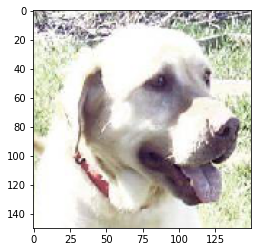

In [ ]:
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

In [ ]:
model.predict(img_tensor)

array([[0.99925137]], dtype=float32)

Our model is 99% certain this is a dog.

In [ ]:
img_path = test_cats_dir + '/cat.1999.jpg'
from keras.preprocessing import image
import numpy as np
img = image.load_img(img_path, target_size=(150, 150))

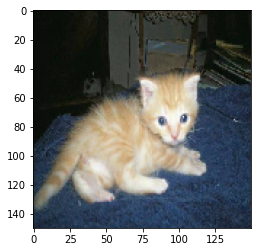

In [ ]:
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

In [ ]:
model.predict(img_tensor)

array([[2.1188065e-05]], dtype=float32)

Our model is 0.3% certain that this is a dog (meaning it is 99.7% sure it is not a dog)

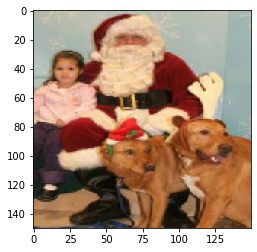

In [ ]:
img_path = test_dogs_dir + '/dog.1800.jpg'
from keras.preprocessing import image
import numpy as np
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

In [ ]:
model.predict(img_tensor)



array([[0.93588364]], dtype=float32)

I have neither given nor received any unauthorized info on this lab. - Bridget Danver